# Spiking Neuron

### The notebook consists of 2 classes:
### 1. Spiking Neuron
### 2. Spiking Neuron with batch random input

In [127]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Spiking Neuron

In [119]:
class Spiking_Neuron:
    dyn_var = {"IB":{'a':0.02,'b':0.2,'c':-55,'d':4,'v':-65},
               "RS":{'a':0.02,'b':0.2,'c':-65,'d':8,'v':-65},
               "LTS":{'a':0.02,'b':0.25,'c':-65,'d':2,'v':-65},
               "TC":{'a':0.02,'b':0.25,'c':-65,'d':0.05,'v':-65},
               "CH":{'a':0.02,'b':0.2,'c':-50,'d':2,'v':-65},
               "RZ":{'a':0.1,'b':0.3,'c':-65,'d':2,'v':-65},
               "FS":{'a':0.1,'b':0.2,'c':-65,'d':2,'v':-65}
              }
    def __init__(self,spike_type):
        if spike_type in self.dyn_var:
            self.a = self.dyn_var[spike_type]['a']
            self.b = self.dyn_var[spike_type]['b']
            self.c = self.dyn_var[spike_type]['c']
            self.d = self.dyn_var[spike_type]['d']
            
            self.v = self.dyn_var[spike_type]['v']
            
            self.duration = 500# milliseconds
            self.v_threshold = 30
        else:
            raise Exception('Please enter a valid spike_type')
            
    def produce_spike(self,I):
        
        a = self.a
        b = self.b
        c = self.c
        d = self.d
        v = self.v
        u = b*v
        
        v_trace = []
        t_trace = []
        
        for t in range(self.duration):
            v_trace.append(v)
            t_trace.append(t)
            if v > v_threshold:
                v = c
                u = u+d
            v += (0.04*v**2 + 5*v + 140 - u + I)
            u += a*(b*v - u)
        return t_trace,v_trace

In [120]:
network = Spiking_Neuron('RS')
t_trace,v_trace = network.produce_spike(I=10)

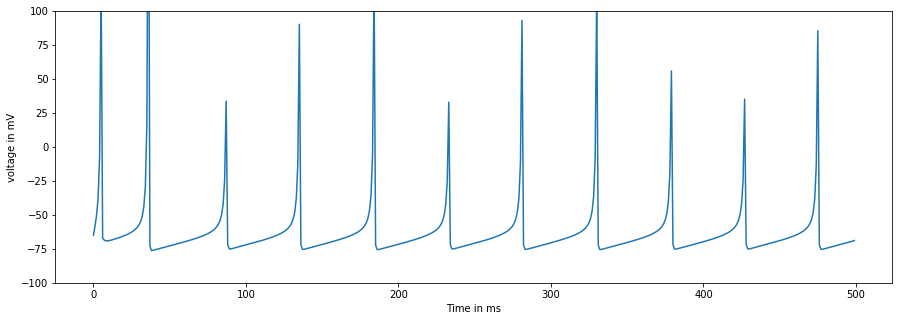

In [122]:
plt.figure(figsize=(15,5))
plt.plot(t_trace,v_trace)
plt.xlabel('Time in ms')
plt.ylabel('voltage in mV')
plt.ylim((-100, 100))
plt.show()

## Spiking Neuron with random batch input

In [123]:
class Spiking_Neuron_batch:
    dyn_var = {"IB":{'a':0.02,'b':0.2,'c':-55,'d':4,'v':-65},
               "RS":{'a':0.02,'b':0.2,'c':-65,'d':8,'v':-65},
               "LTS":{'a':0.02,'b':0.25,'c':-65,'d':2,'v':-65},
               "TC":{'a':0.02,'b':0.25,'c':-65,'d':0.05,'v':-65},
               "CH":{'a':0.02,'b':0.2,'c':-50,'d':2,'v':-65},
               "RZ":{'a':0.1,'b':0.3,'c':-65,'d':2,'v':-65},
               "FS":{'a':0.1,'b':0.2,'c':-65,'d':2,'v':-65}
              }
        
    def __init__(self,spike_type="RS"):
        if spike_type in self.dyn_var:
            self.a = self.dyn_var[spike_type]['a']
            self.b = self.dyn_var[spike_type]['b']
            self.c = self.dyn_var[spike_type]['c']
            self.d = self.dyn_var[spike_type]['d']
            
            self.v = self.dyn_var[spike_type]['v']
            
            self.I_EPSP = 5
            self.I_IPSP = 1
            
            self.ne=800
            self.ni=200
                       
            self.duration = 1000 # milliseconds
        else:
            raise Exception('Please enter a valid spike_type')
            
    def set_parameters(self,a=None,b=None,c=None,d=None,v=None,I_EPSP=None,I_IPSP=None,duration=None,ne=None,ni=None):
        
        if a is None:
            a = self.a
        if b is None:
            b = self.b
        if c is None:
            c = self.c
        if d is None:
            d = self.d
        if v is None:
            v = self.v
        if I_EPSP is None:
            I_EPSP = self.I_EPSP
        if I_IPSP is None:
            I_IPSP = self.I_IPSP
        if duration is None:
            duration = self.duration
        if ne is None:
            ne = self.ne
        if ni is None:
            ni = self.ni
        
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.v = v
        self.I_EPSP = I_EPSP
        self.I_IPSP = I_IPSP
        
        self.ne=ne
        self.ni=ni
        self.duration = duration
        
    def produce_spike(self,I_EPSP=None,I_IPSP=None):
        if I_EPSP is None:
            I = self.I_EPSP
        if I_IPSP is None:
            I = self.I_IPSP
            
        ne = self.ne
        ni = self.ni
        a = self.a*np.ones([ne+ni,1])
        b = self.b*np.ones([ne+ni,1])
        c = self.c*np.ones([ne+ni,1])
        d = self.d*np.ones([ne+ni,1])
        v = self.v*np.ones([ne+ni,1])
        
        v_trail = np.array([]).reshape([0,2])
        
        u = np.multiply(b,v)
        firings=np.array([]).reshape([0,2])
        for t in range(1,self.duration):
            v_trail = np.concatenate((v_trail,np.concatenate((t+0*v,v),axis=1)),axis=0)
            I = np.concatenate((self.I_EPSP*np.random.randn(ne,1),self.I_IPSP*np.random.randn(ni,1)),axis=0)
            fired = np.expand_dims(np.where(v>=30)[0],axis=1)
            firings = np.concatenate((firings,np.concatenate((t+0*fired,fired),axis=1)),axis=0)
            v[fired] = c[fired]
            u[fired] = u[fired] + d[fired]
            #I = I + np.sum(s[:,fired],axis=1)
            #print("I2 is ",I)
            v=v+0.5*(0.04*np.square(v)+5*v+140-u+I)
            v=v+0.5*(0.04*np.square(v)+5*v+140-u+I)
            #print("V is ",v)
            u=u+np.multiply(a,(np.multiply(b,v)-u))
            #print("u is ",u)
        return firings,v_trail


(4174, 2)


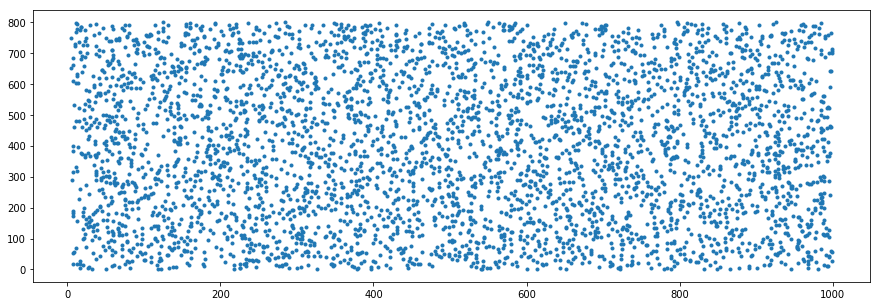

In [125]:
network = Spiking_Neuron_batch("IB")
network.set_parameters(ne=800,ni=200,duration=1000)
firings,v_trail = network.produce_spike(I_EPSP=5,I_IPSP=1)
print(firings.shape)
plt.figure(figsize=(15,5))
plt.plot(firings[:,0],firings[:,1],'.')
plt.show()

### Let us set the parameters with 1 neuron , I = 10 for EPSP, I =5 for IPSP

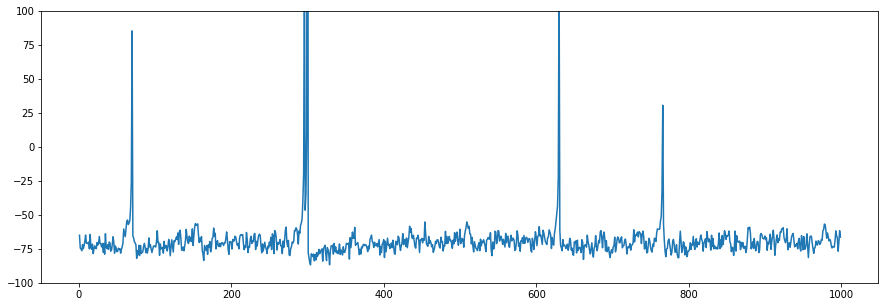

In [131]:
network = Spiking_Neuron_batch("IB")
network.set_parameters(ne=1,ni=0,duration=1000)
_,v_trail = network.produce_spike(I_EPSP=10,I_IPSP=5)
#print(v_trail)
plt.figure(figsize=(15,5))
  # return the current ylim
plt.ylim((-100, 100))
plt.plot(v_trail[:,0],v_trail[:,1])
plt.show()